In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import os, math
import matplotlib.pyplot as plt
import imageio

In [ ]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')  #Full file path to project folder: /content/gdrive/My Drive/Projects/GRCA-Spring-WaterChemistry/HowtomakeaPiperDiagramwithPython

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
md

/content/gdrive/My Drive/Projects/GRCA-Spring-WaterChemistry


In [ ]:
#nos dirigimos al sitio del formato
img = imageio.imread("/content/gdrive/My Drive/Projects/GRCA-Spring-WaterChemistry/HowtomakeaPiperDiagramwithPython/Figures/PiperCompleto.png")

In [ ]:
Nick#importamos los datos
datosQuimica = pd.read_excel('/content/gdrive/My Drive/Projects/GRCA-Spring-WaterChemistry/HowtomakeaPiperDiagramwithPython/Xls/HatariChem_FormatodeTrabajo.xlsx')

#quitamos los caracteres que producen error
datosQuimica['Estacion'] = datosQuimica['Estacion'].str.replace("/","_")
datosQuimica['Estacion'] = datosQuimica['Estacion'].str.replace("–","-")
datosQuimica['Estacion'] = datosQuimica['Estacion'].str.replace(" |%/s","")
datosQuimica = datosQuimica.set_index(['Estacion'])

datosQuimica.head()

,Este,Norte,Cuenca,Fecha,HCO3,CO3,SO4,Cl,Na,Ca,Mg,K
Estacion,,,,,,,,,,,,
CHA-01,791048.0,9231754.0,RioChailhuagon,2007-11-11,94.0,94.0,55.40,2.89,4.18,46.2,2.46,0.04
CHEX-01,791699.0,9233982.0,QuebradaAltoChirimayo,2009-05-27,122.0,2.0,9.70,0.40,6.25,27.4,9.06,1.90
CHEX-03,793806.0,9232908.0,QuebradaAltoChirimayo,2003-09-26,640.0,640.0,13.60,14.60,4.79,146.0,10.90,27.30
CJEX-01,788976.0,9231533.0,RioChailhuagon,2003-09-27,195.0,195.0,2.69,4.56,28.60,26.0,9.88,2.81
CJEX-02,789070.0,9231112.0,RioChailhuagon,2009-05-28,205.0,1.0,11.50,0.30,2.45,66.0,9.29,0.54


In [ ]:
#diccionario de iones
iones = {
'HCO3': 61, 'CO3' : 30, 'Cl' : 35, 'SO4': 48,
'Na' : 23, 'Ca' : 20, 'Mg' : 12, 'K'  : 39
}

#generamos las columnas de concentraciones equivalentes
for ion in iones.keys():
    datosQuimica[str(ion)+'_meq'] = datosQuimica[ion]/iones[ion]
    
datosQuimica.head()

,Este,Norte,Cuenca,Fecha,HCO3,CO3,SO4,Cl,Na,Ca,Mg,K,HCO3_meq,CO3_meq,Cl_meq,SO4_meq,Na_meq,Ca_meq,Mg_meq,K_meq
Estacion,,,,,,,,,,,,,,,,,,,,
CHA-01,791048.0,9231754.0,RioChailhuagon,2007-11-11,94.0,94.0,55.40,2.89,4.18,46.2,2.46,0.04,1.540984,3.133333,0.082571,1.154167,0.181739,2.31,0.205000,0.001026
CHEX-01,791699.0,9233982.0,QuebradaAltoChirimayo,2009-05-27,122.0,2.0,9.70,0.40,6.25,27.4,9.06,1.90,2.000000,0.066667,0.011429,0.202083,0.271739,1.37,0.755000,0.048718
CHEX-03,793806.0,9232908.0,QuebradaAltoChirimayo,2003-09-26,640.0,640.0,13.60,14.60,4.79,146.0,10.90,27.30,10.491803,21.333333,0.417143,0.283333,0.208261,7.30,0.908333,0.700000
CJEX-01,788976.0,9231533.0,RioChailhuagon,2003-09-27,195.0,195.0,2.69,4.56,28.60,26.0,9.88,2.81,3.196721,6.500000,0.130286,0.056042,1.243478,1.30,0.823333,0.072051
CJEX-02,789070.0,9231112.0,RioChailhuagon,2009-05-28,205.0,1.0,11.50,0.30,2.45,66.0,9.29,0.54,3.360656,0.033333,0.008571,0.239583,0.106522,3.30,0.774167,0.013846


In [ ]:
#normalizamos los aniones
datosQuimica['SO4_norm'] = datosQuimica['SO4_meq'] / (datosQuimica['SO4_meq'] +
                            datosQuimica['HCO3_meq']+datosQuimica['CO3_meq']+datosQuimica['Cl_meq']) * 100
datosQuimica['HCO3_CO3_norm'] = (datosQuimica['HCO3_meq']+datosQuimica['CO3_meq']) / (datosQuimica['SO4_meq'] +
                            datosQuimica['HCO3_meq']+datosQuimica['CO3_meq']+datosQuimica['Cl_meq']) * 100
datosQuimica['Cl_norm'] = datosQuimica['Cl_meq'] / (datosQuimica['SO4_meq'] +
                            datosQuimica['HCO3_meq']+datosQuimica['CO3_meq']+datosQuimica['Cl_meq']) * 100

#normalizamos los cationes
datosQuimica['Mg_norm'] = datosQuimica['Mg_meq'] / (datosQuimica['Mg_meq'] +
                            datosQuimica['Ca_meq']+datosQuimica['K_meq']+datosQuimica['Na_meq']) * 100
datosQuimica['Na_K_norm'] = (datosQuimica['K_meq']+datosQuimica['Na_meq']) / (datosQuimica['Mg_meq'] +
                            datosQuimica['Ca_meq']+datosQuimica['K_meq']+datosQuimica['Na_meq']) * 100
datosQuimica['Ca_norm'] = datosQuimica['Ca_meq'] / (datosQuimica['Mg_meq'] +
                            datosQuimica['Ca_meq']+datosQuimica['K_meq']+datosQuimica['Na_meq']) * 100


In [ ]:
#funcion de las coordenadas
def coordenada(Ca,Mg,Cl,SO4,Label):
    xcation = 40 + 360 - (Ca + Mg / 2) * 3.6
    ycation = 40 + (math.sqrt(3) * Mg / 2)* 3.6
    xanion = 40 + 360 + 100 + (Cl + SO4 / 2) * 3.6
    yanion = 40 + (SO4 * math.sqrt(3) / 2)* 3.6
    xdiam = 0.5 * (xcation + xanion + (yanion - ycation) / math.sqrt(3))
    ydiam = 0.5 * (yanion + ycation + math.sqrt(3) * (xanion - xcation))
    #print(str(xanion) + ' ' + str(yanion))
    c=np.random.rand(3,1).ravel()
    listagraph=[]
    listagraph.append(plt.scatter(xcation,ycation,zorder=1,c=c, s=60, edgecolors='#4b4b4b',label=Label))
    listagraph.append(plt.scatter(xanion,yanion,zorder=1,c=c, s=60, edgecolors='#4b4b4b'))
    listagraph.append(plt.scatter(xdiam,ydiam,zorder=1,c=c, s=60, edgecolors='#4b4b4b'))
    return listagraph

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

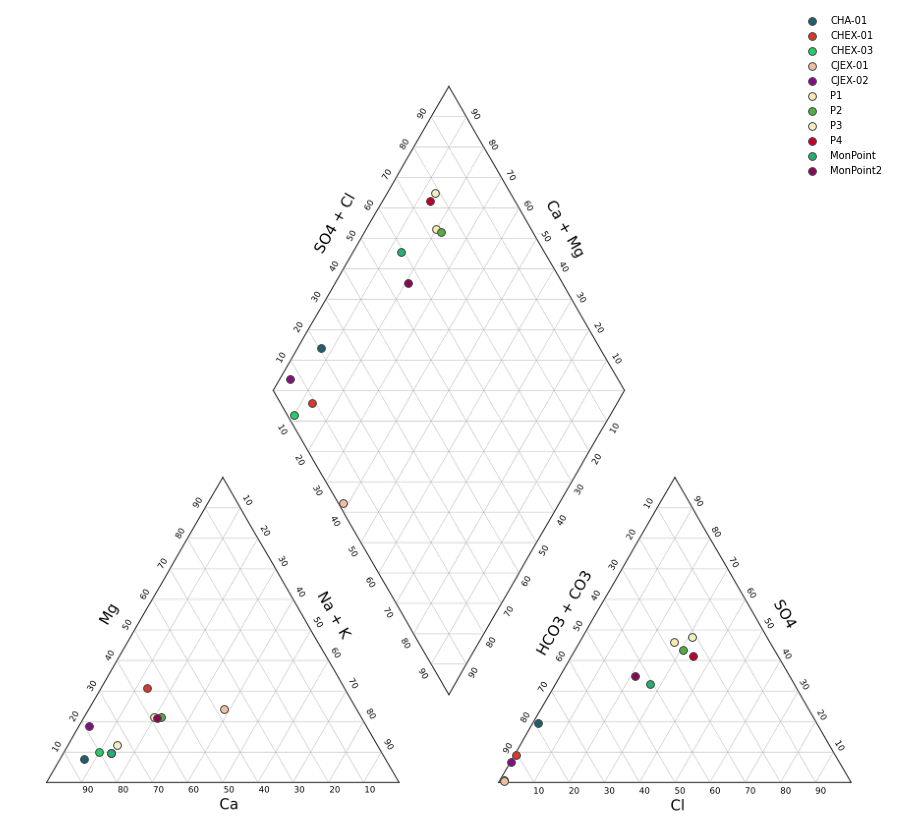

In [ ]:
plt.figure(figsize=(20,15))
plt.imshow(np.flipud(img),zorder=0)
for index, row in datosQuimica.iterrows():
    coordenada(row['Ca_norm'],row['Mg_norm'],row['Cl_norm'],row['SO4_norm'],index)
plt.ylim(0,830)
plt.xlim(0,900)
plt.axis('off')
plt.legend(loc='upper right',prop={'size':10}, frameon=False, scatterpoints=1)

# plt.savefig('../Output/Piper.png')
# plt.savefig('../Output/Piper.pdf')
# plt.savefig('../Output/Piper.svg')